# Projeto "Prevendo Customer Churn em Operadoras de Telecom"
## Formação Cientista de Dado
### Projeto 01 - Curso de Big Data Analytics com Python e Spark




Autor: Alexadre Felix

Material de estudos e pesquisa, fique a vontade para copiar o código ou partes dele e modifica-los.
Em caso de reprodução, citar este arquivo fonte.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

## Importacao e Conferencia dos Dados

In [2]:
arquivo = 'projeto4_telecom_treino.csv'
df = pd.read_csv(arquivo)

In [3]:
df.head()

Unnamed: 0 state  account_length      area_code international_plan  \
0           1    KS             128  area_code_415                 no   
1           2    OH             107  area_code_415                 no   
2           3    NJ             137  area_code_415                 no   
3           4    OH              84  area_code_408                yes   
4           5    OK              75  area_code_415                yes   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls  churn  
0                              1     no  
1                              1     no  
2                              0     no  
3                              2     no  
4                              3     no  

[5 rows x 21 columns]

In [4]:
# Conferindo os valores da coluna 'Unnamed:0' pois parece ser uma lista de IDs unicos
df['Unnamed: 0'].nunique()

3333

In [5]:
# Como não precisamos de valores de ID, iremos deletar a coluna do nosso dataset
df = df.drop(['Unnamed: 0'], axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls           

In [7]:
df.describe()

account_length  number_vmail_messages  total_day_minutes  \
count     3333.000000            3333.000000        3333.000000   
mean       101.064806               8.099010         179.775098   
std         39.822106              13.688365          54.467389   
min          1.000000               0.000000           0.000000   
25%         74.000000               0.000000         143.700000   
50%        101.000000               0.000000         179.400000   
75%        127.000000              20.000000         216.400000   
max        243.000000              51.000000         350.800000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  number_customer_service_calls  
count        3333.000000                    3333.000000  
mean            2.764581                       1.562856  
std             0.753773                       1.315491  
min             0.000000                       0.000000  
25%             2.300000                       1.000000  
50%             2.780000                       1.000000  
75%             3.270000                       2.000000  
max             5.400000                       9.000000

## Analise Exploratória dos Dados

In [8]:
# Verificando se as classes de saida estão balanceadas
df.groupby('churn').size()

churn
no     2850
yes     483
dtype: int64

Temos muito mais saídas de churn para não do que para sim, talvez seja necessário fazer o balanceamento das classes para apresentar os dados de treino.

In [9]:
# Verificando o skew
df.skew()

account_length                   0.096606
number_vmail_messages            1.264824
total_day_minutes               -0.029077
total_day_calls                 -0.111787
total_day_charge                -0.029083
total_eve_minutes               -0.023877
total_eve_calls                 -0.055563
total_eve_charge                -0.023858
total_night_minutes              0.008921
total_night_calls                0.032500
total_night_charge               0.008886
total_intl_minutes              -0.245136
total_intl_calls                 1.321478
total_intl_charge               -0.245287
number_customer_service_calls    1.091359
dtype: float64

## Analise Grafica - Dados Quantitativos

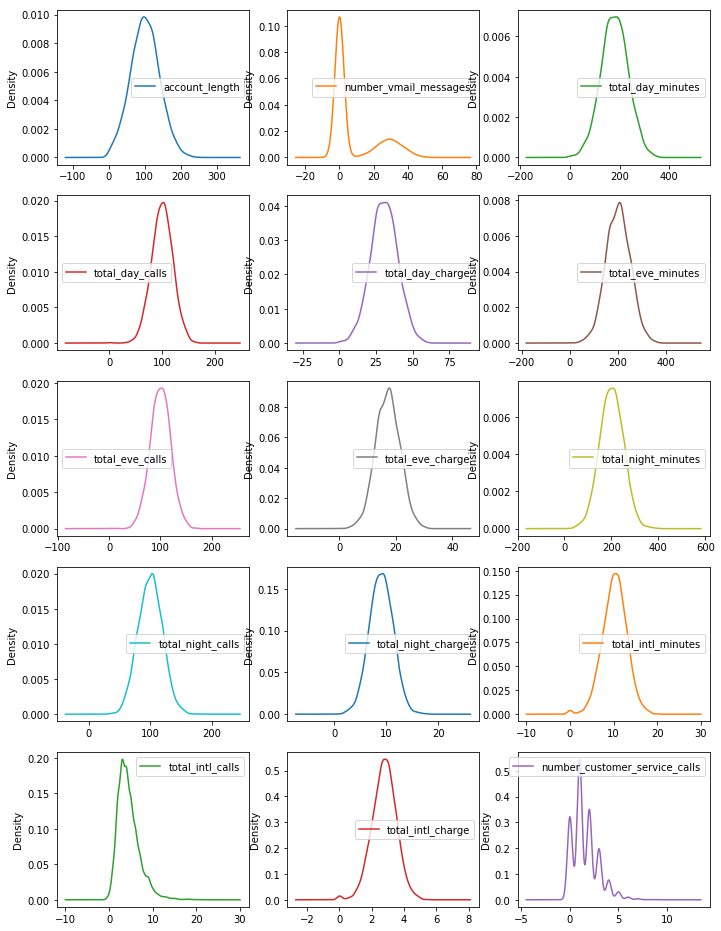

In [10]:
# Density Plots
df.plot(kind = 'density',layout = (5,3), subplots = True,  sharex = False, figsize = (11.7, 16.5))
plt.show()

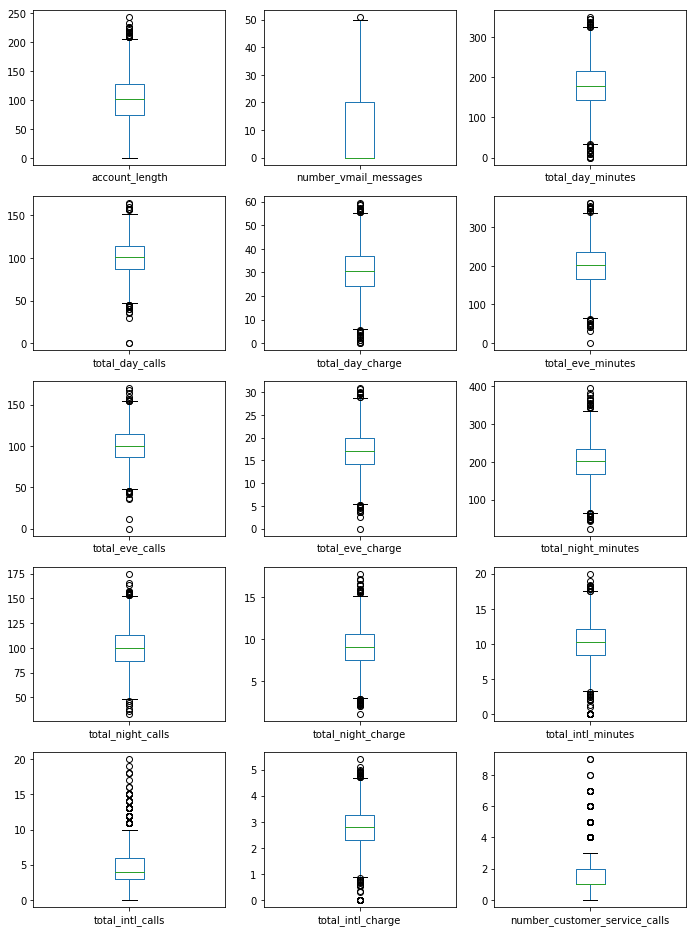

In [11]:
# Box and Whisker Plots
df.plot(kind = 'box', subplots = True, layout = (5,3), sharex = False, sharey = False, figsize = (11.7, 16.5))
plt.show()

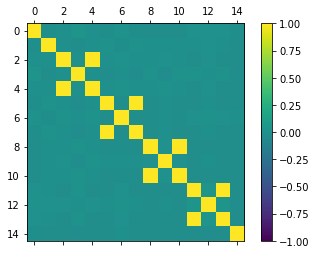

In [12]:
# Gerando matriz de correlação
correlations = df.corr()

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

In [13]:
df.corr()

account_length  number_vmail_messages  \
account_length                       1.000000              -0.004628   
number_vmail_messages               -0.004628               1.000000   
total_day_minutes                    0.006216               0.000778   
total_day_calls                      0.038470              -0.009548   
total_day_charge                     0.006214               0.000776   
total_eve_minutes                   -0.006757               0.017562   
total_eve_calls                      0.019260              -0.005864   
total_eve_charge                    -0.006745               0.017578   
total_night_minutes                 -0.008955               0.007681   
total_night_calls                   -0.013176               0.007123   
total_night_charge                  -0.008960               0.007663   
total_intl_minutes                   0.009514               0.002856   
total_intl_calls                     0.020661               0.013957   
total_intl_charge                    0.009546               0.002884   
number_customer_service_calls       -0.003796              -0.013263   

                               total_day_minutes  total_day_calls  \
account_length                          0.006216         0.038470   
number_vmail_messages                   0.000778        -0.009548   
total_day_minutes                       1.000000         0.006750   
total_day_calls                         0.006750         1.000000   
total_day_charge                        1.000000         0.006753   
total_eve_minutes                       0.007043        -0.021451   
total_eve_calls                         0.015769         0.006462   
total_eve_charge                        0.007029        -0.021449   
total_night_minutes                     0.004323         0.022938   
total_night_calls                       0.022972        -0.019557   
total_night_charge                      0.004300         0.022927   
total_intl_minutes                     -0.010155         0.021565   
total_intl_calls                        0.008033         0.004574   
total_intl_charge                      -0.010092         0.021666   
number_customer_service_calls          -0.013423        -0.018942   

                               total_day_charge  total_eve_minutes  \
account_length                         0.006214          -0.006757   
number_vmail_messages                  0.000776           0.017562   
total_day_minutes                      1.000000           0.007043   
total_day_calls                        0.006753          -0.021451   
total_day_charge                       1.000000           0.007050   
total_eve_minutes                      0.007050           1.000000   
total_eve_calls                        0.015769          -0.011430   
total_eve_charge                       0.007036           1.000000   
total_night_minutes                    0.004324          -0.012584   
total_night_calls                      0.022972           0.007586   
total_night_charge                     0.004301          -0.012593   
total_intl_minutes                    -0.010157          -0.011035   
total_intl_calls                       0.008032           0.002541   
total_intl_charge                     -0.010094          -0.011067   
number_customer_service_calls         -0.013427          -0.012985   

                               total_eve_calls  total_eve_charge  \
account_length                        0.019260         -0.006745   
number_vmail_messages                -0.005864          0.017578   
total_day_minutes                     0.015769          0.007029   
total_day_calls                       0.006462         -0.021449   
total_day_charge                      0.015769          0.007036   
total_eve_minutes                    -0.011430          1.000000   
total_eve_calls                       1.000000         -0.011423   
total_eve_charge                     -0.011423          1.000000   
total_night_minutes                  -0.

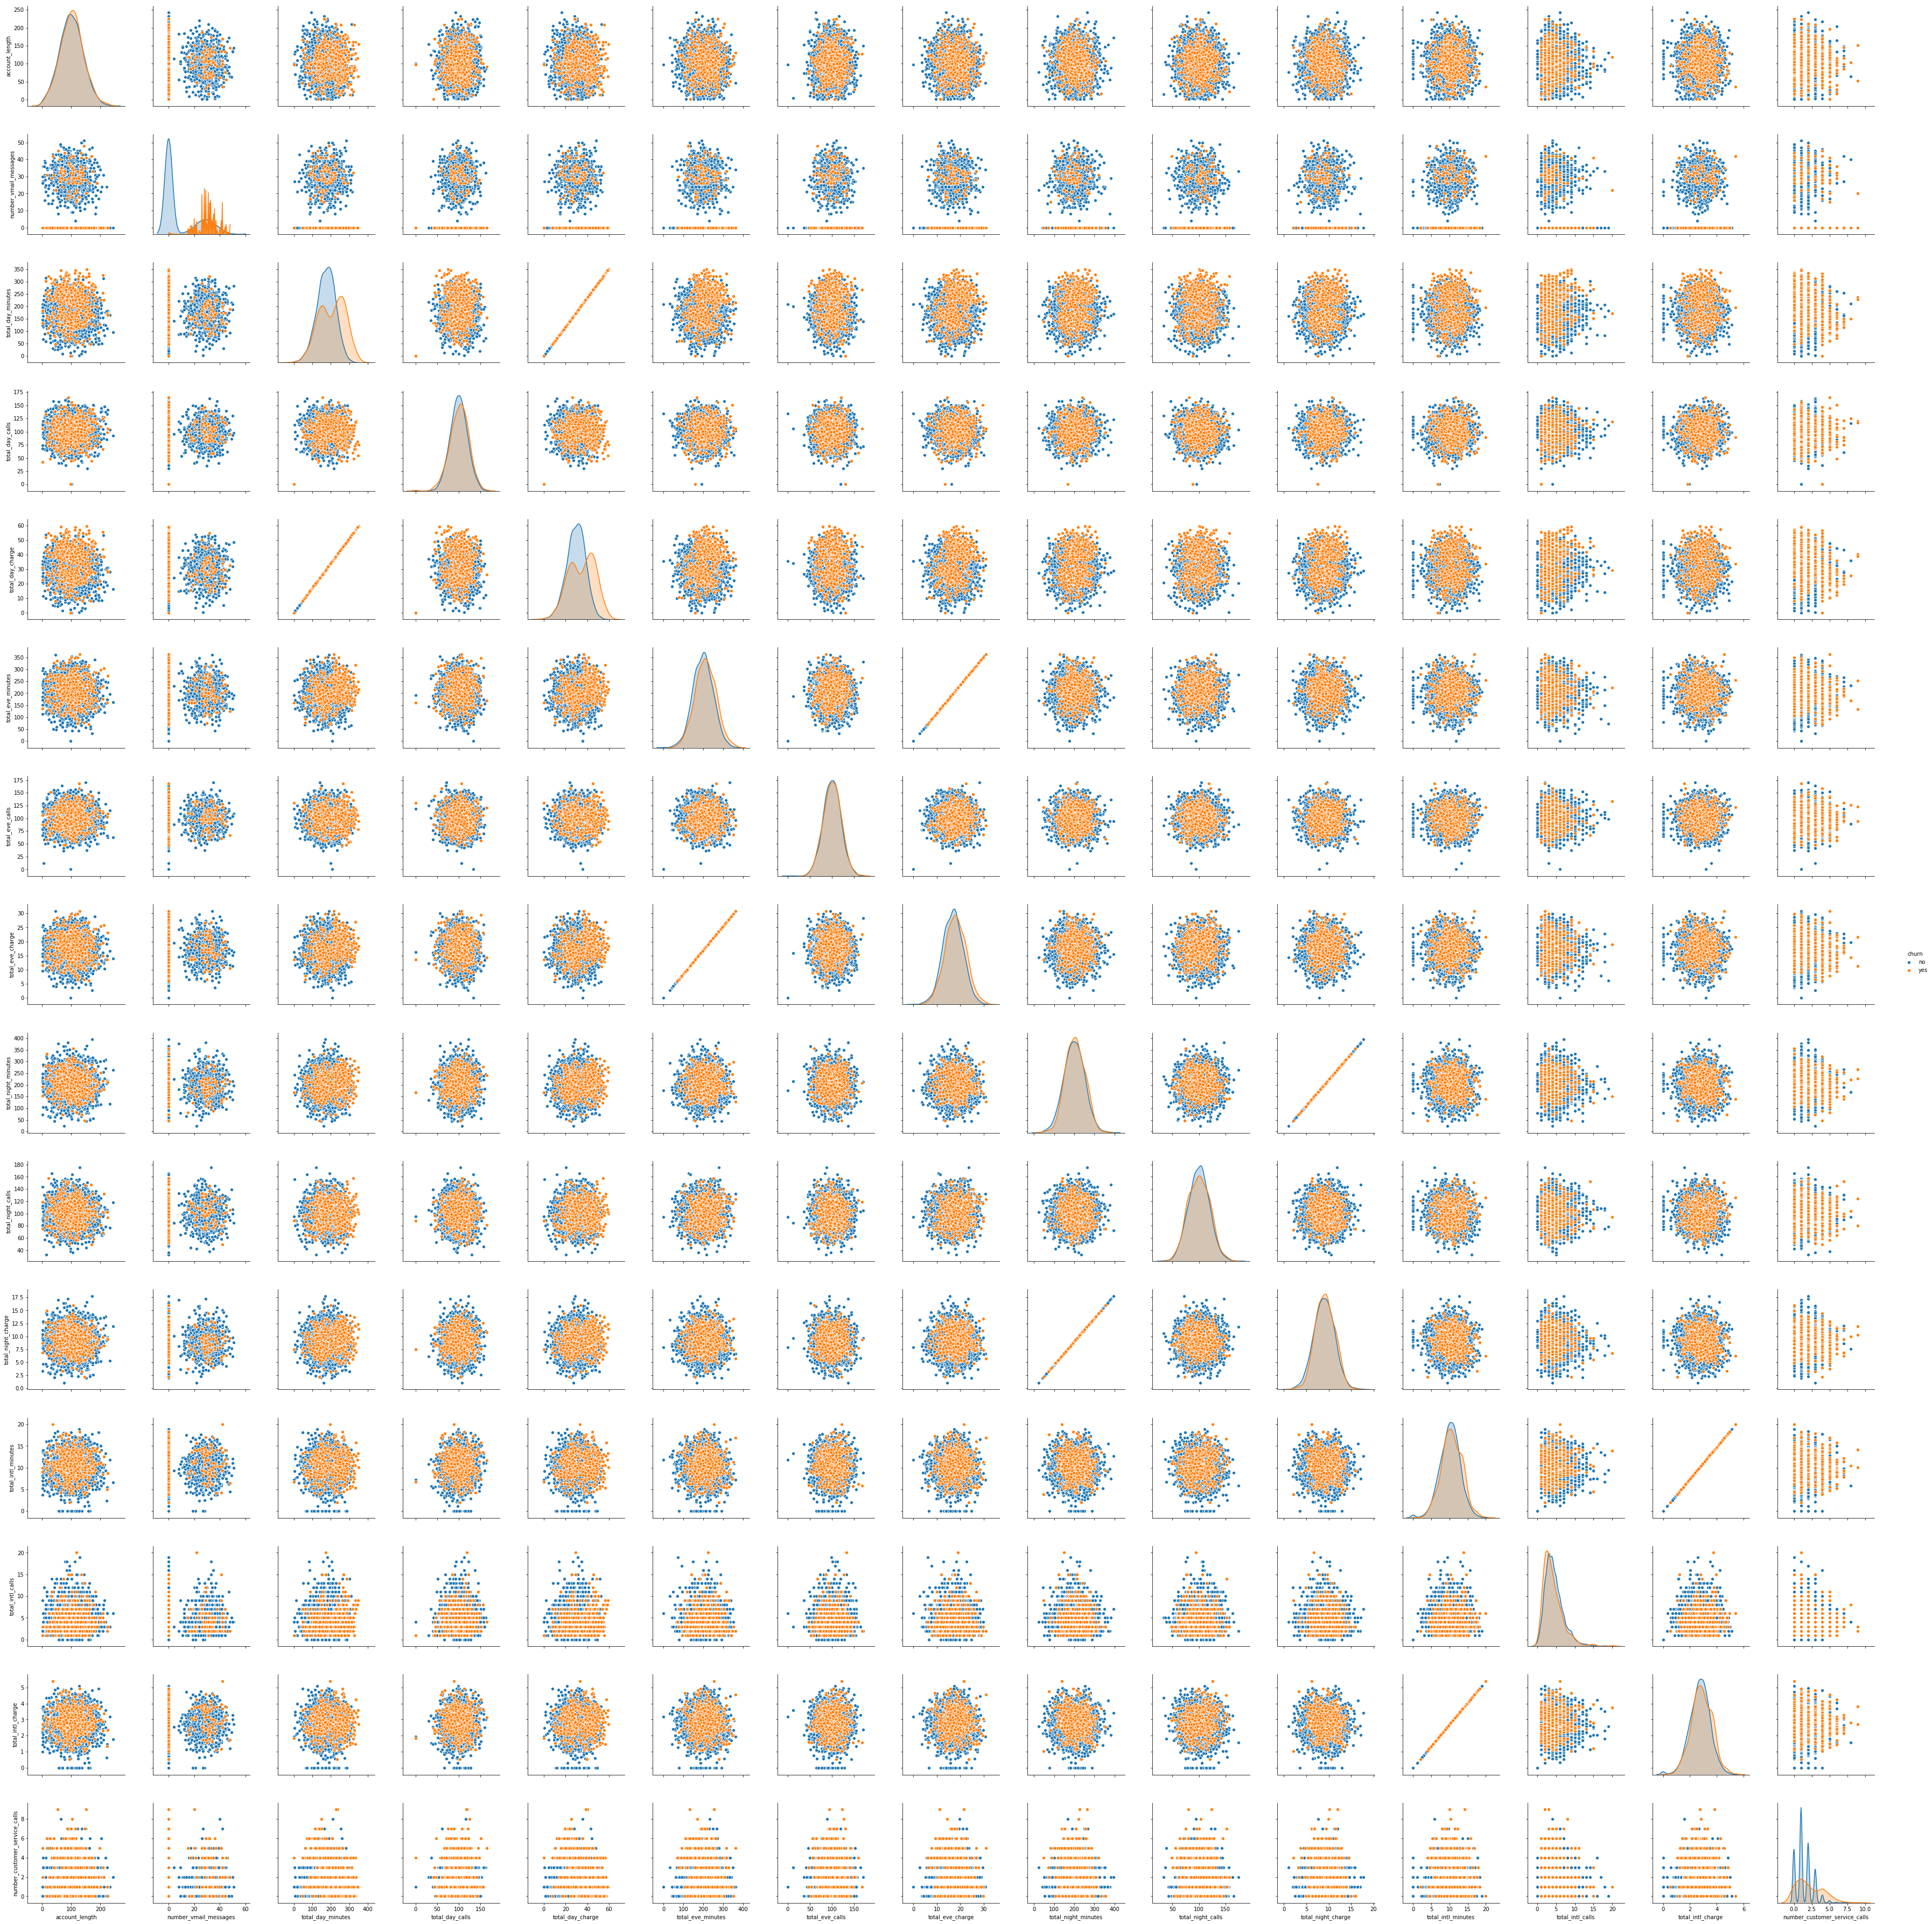

In [14]:
# Pairplot
plot_01 = sns.pairplot(df, hue = 'churn')
plot_01.fig.set_size_inches(50,50)

## Analise Grafica - Dados Qualitativos

In [18]:
# Verificando o numero de churns por estado

lista_qualitativas = ('state','area_code', 'international_plan', 'voice_mail_plan', 'churn')

df_qualitativas = df[[*lista_qualitativas]]
df_qualitativas.head()

state      area_code international_plan voice_mail_plan churn
0    KS  area_code_415                 no             yes    no
1    OH  area_code_415                 no             yes    no
2    NJ  area_code_415                 no              no    no
3    OH  area_code_408                yes              no    no
4    OK  area_code_415                yes              no    no

In [19]:
#Verificando valores unicos da coluna estado e da coluna area_codeo
print('Numero de estados analisados:', len (df_qualitativas['state'].unique()))
print ('Numero de areas analisadas:', len (df_qualitativas['area_code'].unique()))

Numero de estados analisados: 51
Numero de areas analisadas: 3


# Taxa de cancelamento por estado - Visão Geral

<Figure size 1440x1152 with 0 Axes>

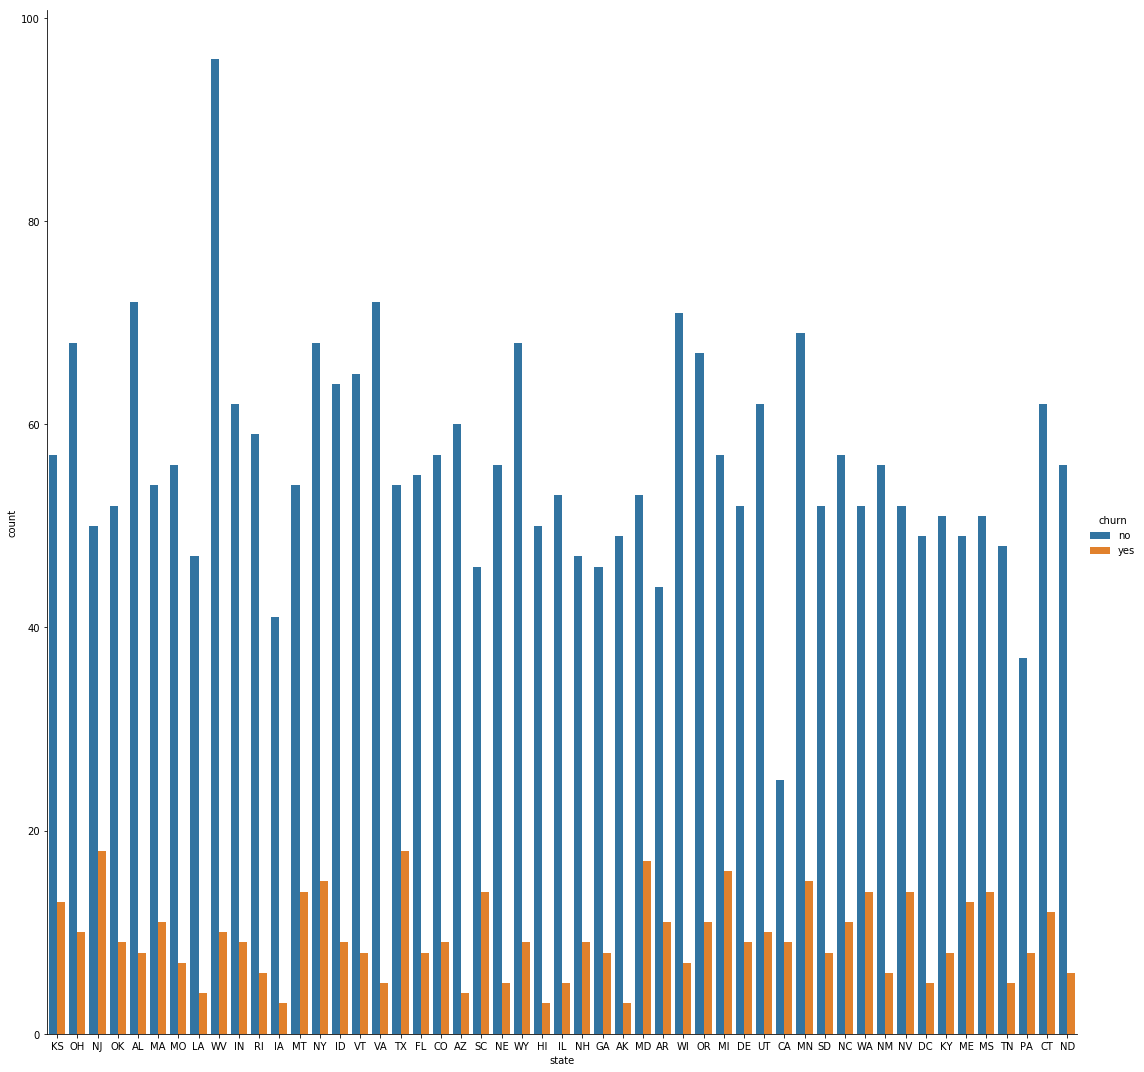

In [20]:
# Visualizando quantidade de churns por estado
plt.figure(figsize=(20, 16))
sns.catplot(data = df_qualitativas, x = "state", hue = "churn", kind = "count", height = 15);

Os dados postos de forma unica não nos indicam uma clareza de taxa de cancelamento por estado.
A seguir iremos seguimentar os tipos de churns e avaliar se podemos extrair uma visão dos estados que mais possuem taxa de cancelamento.

In [28]:
# Visualizando a porcentagem total de churns
df_churns = pd.get_dummies(df_qualitativas, columns = ['churn'])
df_churns.head()

state      area_code international_plan voice_mail_plan  churn_no  churn_yes
0    KS  area_code_415                 no             yes         1          0
1    OH  area_code_415                 no             yes         1          0
2    NJ  area_code_415                 no              no         1          0
3    OH  area_code_408                yes              no         1          0
4    OK  area_code_415                yes              no         1          0

In [79]:
# Verificando a taxa de churn por estado e imprimindo 15 estados que mais possuem taxas de churns
df_churns_by_state = df_churns.groupby(['state'], as_index = False).agg({'churn_no' : 'sum', 'churn_yes' : 'sum'})
df_churns_by_state['churn_rate'] = round(df_churns_by_state['churn_yes']/ (df_churns_by_state['churn_yes'] + df_churns_by_state['churn_no'])
                                         , 2) * 100
df_churns_by_state['total_clients'] = df_churns_by_state['churn_no'] + df_churns_by_state['churn_yes']

df_churns_by_state = df_churns_by_state.sort_values('churn_rate', ascending = False)
df_churns_by_state.head(15)

state  churn_no  churn_yes  churn_rate  total_clients
31    NJ        50         18        26.0             68
4     CA        25          9        26.0             34
43    TX        54         18        25.0             72
20    MD        53         17        24.0             70
40    SC        46         14        23.0             60
22    MI        57         16        22.0             73
25    MS        51         14        22.0             65
26    MT        54         14        21.0             68
33    NV        52         14        21.0             66
21    ME        49         13        21.0             62
47    WA        52         14        21.0             66
2     AR        44         11        20.0             55
16    KS        57         13        19.0             70
34    NY        68         15        18.0             83
38    PA        37          8        18.0             45

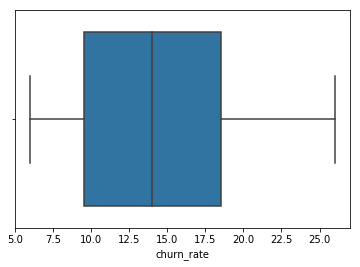

In [80]:
# Conferindo distribuição das taxas de churn
sns.boxplot(x = df_churns_by_state['churn_rate']);

In [81]:
df_churns_by_state.describe()

churn_no  churn_yes  churn_rate  total_clients
count  51.000000  51.000000   51.000000      51.000000
mean   55.882353   9.470588   14.509804      65.352941
std    10.804901   4.001764    5.724937      11.801396
min    25.000000   3.000000    6.000000      34.000000
25%    50.000000   6.500000    9.500000      59.500000
50%    54.000000   9.000000   14.000000      65.000000
75%    62.000000  12.500000   18.500000      72.500000
max    96.000000  18.000000   26.000000     106.000000

Com a segmentação acima, foi adotado o critério de seleção para analise os 10 estados que mais possuem taxa de cancelamento.
A decisão esta baseada conforme a leitura do dataframe: "df_churns_by_state" juntamente com o boxplot, indicando que valores acima de 18% de taxa de cancelamento já estão no Q4.

### Taxa de cancelamento nos Estados + Codigo de Area

In [156]:
# Criando lista de estados com maior numero de churns
lista_churns_estado = df_churns_by_state['state'].head(10).values.tolist()
lista_churns_estado

['NJ', 'CA', 'TX', 'MD', 'SC', 'MI', 'MS', 'MT', 'NV', 'ME']

In [158]:
#df_top_churns_by_state = 

df_top_churns_by_state = df[df['state'].isin(lista_churns_estado)]
df_top_churns_by_state.head()

state  account_length      area_code international_plan voice_mail_plan  \
2     NJ             137  area_code_415                 no              no   
13    MT              95  area_code_510                 no              no   
19    TX              73  area_code_415                 no              no   
23    SC             111  area_code_415                 no              no   
27    MT              54  area_code_408                 no              no   

    number_vmail_messages  total_day_minutes  total_day_calls  \
2                       0              243.4              114   
13                      0              156.6               88   
19                      0              224.4               90   
23                      0              110.4              103   
27                      0              134.3               73   

    total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
2              41.38              121.2              110             10.30   
13             26.62              247.6               75             21.05   
19             38.15              159.5               88             13.56   
23             18.77              137.3              102             11.67   
27             22.83              155.5              100             13.22   

    total_night_minutes  total_night_calls  total_night_charge  \
2                 162.6                104                7.32   
13                192.3                115                8.65   
19                192.8                 74                8.68   
23                189.6                105                8.53   
27                102.1                 68                4.59   

    total_intl_minutes  total_intl_calls  total_intl_charge  \
2                 12.2                 5               3.29   
13                12.3                 5               3.32   
19                13.0                 2               3.51   
23                 7.7                 6               2.08   
27                14.7                 4               3.97   

    number_customer_service_calls churn  
2                               0    no  
13                              3    no  
19                              1    no  
23                              2    no  
27                              3    no

<Figure size 1440x1152 with 0 Axes>

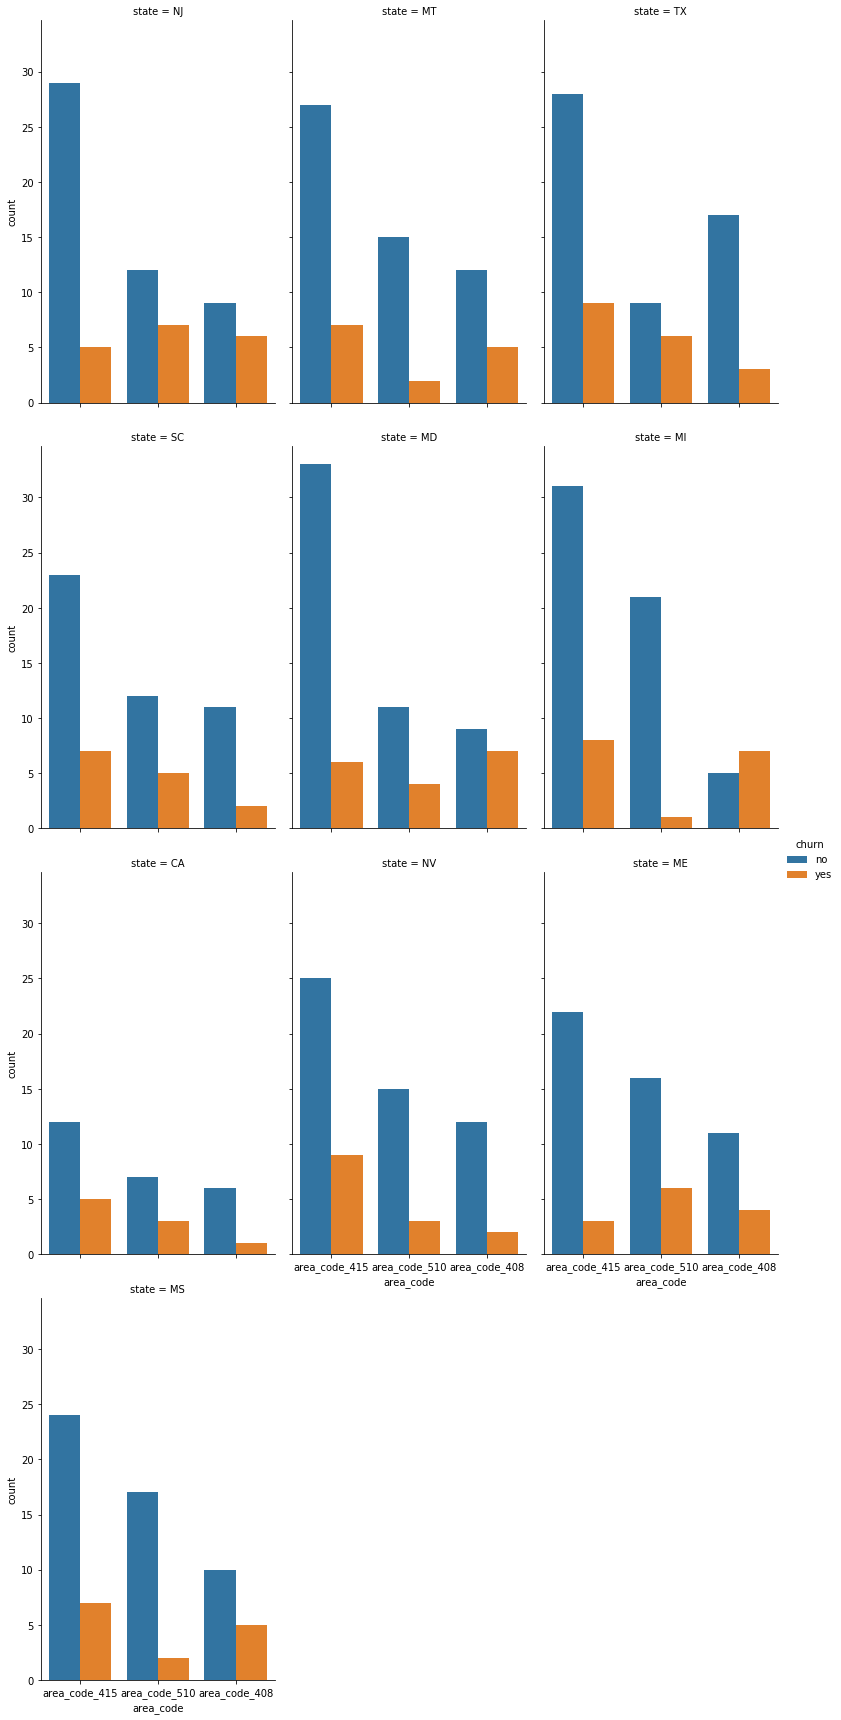

In [159]:
# Visualizando quantidade de churns por area code
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_top_churns_by_state, x = "area_code",
            hue = "churn",
            kind = "count", 
            col = 'state', col_wrap = 3,
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6); 

Analisando a taxa de churn dentro dos estados, e depois por area, concluiu-se que a maioria dos estados possuem uma taxa de distribuição de clientes por area e codigo parecidas. Existe, visualmente, uma tendencia de menor quantidade de clientes nas areas codigos 501 e 408. Os mesmos tem as maiores taxas de churn. 
Para analise de negocios foi gerado os dez estados com maior taxa de cancelamento, já com os valores dos codigos de area segregados, para uma analise póstuma.

  - O Estado NJ e areas 510 e 408 possuem uma alta recorrencia de churn
  - O Estado TX e area 510 possui uma alta taxa de recorrencia de churn
  - O Estado MD e area 408 possui uma alta taxa de recorrencia de churn
  - O Estado MI e area 408 possui a maior taxa de recorrencia de churn

### Taxa de cancelamento em contratos que possuem plano internacional

<Figure size 1440x1152 with 0 Axes>

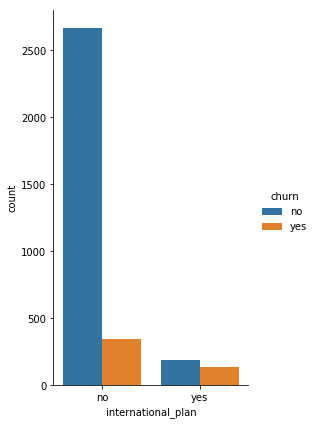

In [163]:
# Visualizando quantidade de churns por tipo de plano internacional
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df, x = "international_plan",
            hue = "churn",
            kind = "count", 
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6); 

In [164]:
int_plan = df_churns.groupby('international_plan').agg({'churn_no' : 'sum','churn_yes' : 'sum' })
int_plan['rate'] = round(int_plan['churn_yes']/ (int_plan['churn_yes'] + int_plan['churn_no']) * 100, 2)
int_plan

churn_no  churn_yes   rate
international_plan                            
no                    2664.0      346.0  11.50
yes                    186.0      137.0  42.41

Analisando a taxa de churn dentro dos planos internacionais, podemos ver a clara diferença entre clientes com churn entre os planos internacionais e nacionais.
A taxa de churn em clientes que possuem plano internacional representa um total de 42,41%.

## Taxa de cancelamento em contratos que possuem Correio de Voz

<Figure size 1440x1152 with 0 Axes>

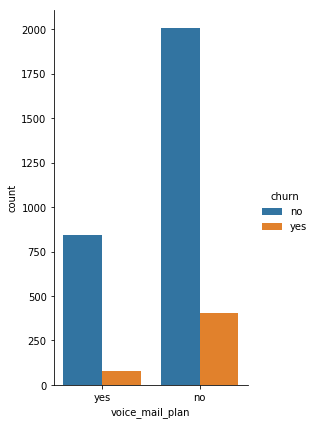

In [165]:
# Visualizando quantidade de churns por tipo de plano internacional
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df, x = "voice_mail_plan",
            hue = "churn",
            kind = "count", 
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6); 

In [166]:
int_voice = df_churns.groupby('voice_mail_plan').agg({'churn_no' : 'sum','churn_yes' : 'sum' })
int_voice['rate'] = round(int_voice['churn_yes']/ (int_voice['churn_yes'] + int_voice['churn_no']) * 100, 2)

int_voice

churn_no  churn_yes   rate
voice_mail_plan                            
no                 2008.0      403.0  16.72
yes                 842.0       80.0   8.68

## Preparando os dados para o modelo

In [167]:
# Criaremos um novo dataframe para não modificarmos nosso dataframe original
df_modelo1 = df

df_modelo1.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    KS             128  area_code_415                 no             yes   
1    OH             107  area_code_415                 no             yes   
2    NJ             137  area_code_415                 no              no   
3    OH              84  area_code_408                yes              no   
4    OK              75  area_code_415                yes              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls churn  
0                              1    no  
1                              1    no  
2                              0    no  
3                              2    no  
4                              3    no

In [168]:
# Primeiro iremos transformar as colunas que possuem valores do tipo 'Sim' e 'Nao'
# Colunas que serão modificadas: 'international_plan', 'voice_mail_plan' e 'churn'

plan_map = {'yes' : 1, 'no' : 0}

df_modelo1 = df_modelo1.replace(plan_map)

df_modelo1.head()

state  account_length      area_code  international_plan  voice_mail_plan  \
0    KS             128  area_code_415                   0                1   
1    OH             107  area_code_415                   0                1   
2    NJ             137  area_code_415                   0                0   
3    OH              84  area_code_408                   1                0   
4    OK              75  area_code_415                   1                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls  churn  
0                              1      0  
1                              1      0  
2                              0      0  
3                              2      0  
4                              3      0

In [195]:
## Iremos seguir com o algoritmo de Regressao Logistica, deste modo o nosso primeiro pré processamento será normalizar o dados

from sklearn.preprocessing import Normalizer

# Separando o array em componentes de input e output
array_treino = df_modelo1.values

x_treino = array_treino[:,3:19]
y_treino = array_treino[:,19]

# Gerando os dados normalizados
scaler_treino = Normalizer().fit(x_treino)
normalizedX_treino = scaler.transform(x_treino)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", df_modelo1.values)
print("\nDados Normalizados: \n\n", normalizedX_treino[0:5,:])


Dados Originais: 

 [['KS' 128 'area_code_415' ... 2.7 1 0]
 ['OH' 107 'area_code_415' ... 3.7 1 0]
 ['NJ' 137 'area_code_415' ... 3.29 0 0]
 ...
 ['RI' 28 'area_code_510' ... 3.81 2 0]
 ['CT' 184 'area_code_510' ... 1.35 2 0]
 ['TN' 74 'area_code_415' ... 3.7 0 0]]

Dados Normalizados: 

 [[0.         0.00222232 0.05555799 0.58913694 0.24445516 0.10015995
  0.4386859  0.22000965 0.03729052 0.54380162 0.20223109 0.02446774
  0.0222232  0.00666696 0.00600026 0.00222232]
 [0.         0.00244374 0.06353731 0.39490885 0.30058037 0.06712962
  0.47775173 0.25170552 0.04061501 0.62168819 0.25170552 0.02798086
  0.03347928 0.00733123 0.00904185 0.00244374]
 [0.         0.         0.         0.65440417 0.3064999  0.11125409
  0.32585779 0.29574552 0.02769253 0.43716565 0.27961394 0.01968052
  0.03280087 0.01344298 0.00884548 0.        ]
 [0.00253392 0.         0.         0.75865503 0.17990817 0.12897642
  0.15684952 0.22298478 0.01332841 0.49892844 0.2255187  0.02245051
  0.01672386 0.01773743 

In [196]:
# Criando um novo dataset normalizado
indice_colunas = list(df_modelo1.columns[3:19])

df_modelo1_normalized_treino = pd.DataFrame(normalizedX, columns = indice_colunas)
df_modelo1_normalized_treino['churn'] = df_modelo1['churn']

df_modelo1_normalized_treino.head()

international_plan  voice_mail_plan  number_vmail_messages  \
0            0.000000         0.002222               0.055558   
1            0.000000         0.002444               0.063537   
2            0.000000         0.000000               0.000000   
3            0.002534         0.000000               0.000000   
4            0.002793         0.000000               0.000000   

   total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0           0.589137         0.244455          0.100160           0.438686   
1           0.394909         0.300580          0.067130           0.477752   
2           0.654404         0.306500          0.111254           0.325858   
3           0.758655         0.179908          0.128976           0.156850   
4           0.465634         0.315637          0.079161           0.414238   

   total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  \
0         0.220010          0.037291             0.543802           0.202231   
1         0.251706          0.040615             0.621688           0.251706   
2         0.295746          0.027693             0.437166           0.279614   
3         0.222985          0.013328             0.498928           0.225519   
4         0.340776          0.035223             0.522057           0.337983   

   total_night_charge  total_intl_minutes  total_intl_calls  \
0            0.024468            0.022223          0.006667   
1            0.027981            0.033479          0.007331   
2            0.019681            0.032801          0.013443   
3            0.022451            0.016724          0.017737   
4            0.023491            0.028212          0.008380   

   total_intl_charge  number_customer_service_calls  churn  
0           0.006000                       0.002222      0  
1           0.009042                       0.002444      0  
2           0.008845                       0.000000      0  
3           0.004510                       0.005068      0  
4           0.007626                       0.008380      0

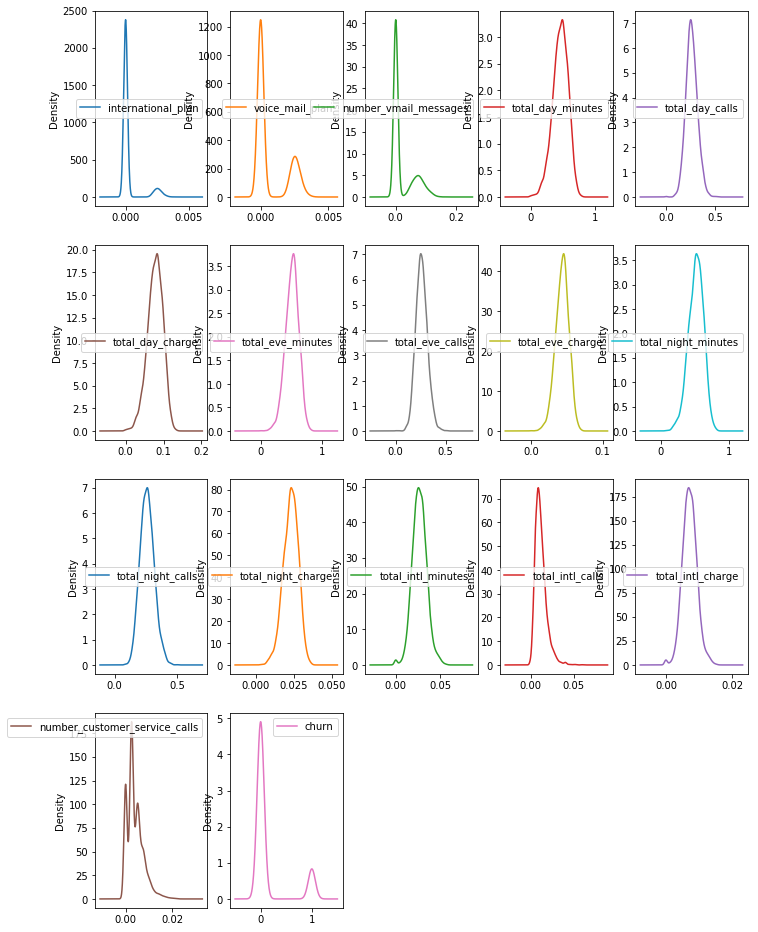

In [197]:
# Density Plots
df_modelo1_normalized_treino.plot(kind = 'density',layout = (4,5), subplots = True,  sharex = False, figsize = (11.7, 16.5))
plt.show()

## Feature Selection

In [198]:
list(df_modelo1_normalized_treino.columns)

['international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churn']

In [199]:
df_modelo1_normalized_treino.dtypes

international_plan               float64
voice_mail_plan                  float64
number_vmail_messages            float64
total_day_minutes                float64
total_day_calls                  float64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                  float64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                float64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                 float64
total_intl_charge                float64
number_customer_service_calls    float64
churn                              int64
dtype: object

In [200]:
# O modelo de Regressão Logistica espera que o valor de saída seja do tipo integer, então iremos mudar o tipo da coluna "Churn" 
df_modelo1_normalized_treino['churn'] = df_modelo1_normalized_treino['churn'].astype('int')

In [209]:
# Para reducao de dimensionalidade será utilizado o metodo PCA - Principal Component Analysis
from sklearn.decomposition import PCA

# Carregando os dados
array_pca = df_modelo1_normalized_treino.values

# Separando o array em componentes de input e output
x_treino_pca = array_pca[:,0:16]
y_treino_pca = array_pca[:,16]

# A selecao de atributos será feita em cima de todas as dimensoes
pca = PCA(n_components = None)
fit = pca.fit(x_treino_pca)

Text(0, 0.5, 'Variancia (%)')

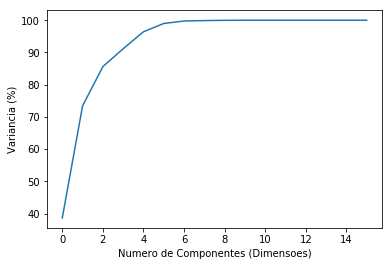

In [210]:
# Com todas as dimensoes podemos visualizar como as dimensoes se comportam explicando a variancia
# deste modo podemos ser mais assertivos quanto ao numero de componentes

plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Numero de Componentes (Dimensoes)")
plt.ylabel("Variancia (%)")

In [211]:
# Iremos considerar como sendo 4 o numero de dimensões do PCA, que captura cerca de 90% da variancia de nossos dados
pca_consolidado = PCA(n_components = 4)
x_treino_pca = pca_consolidado.fit_transform(x_teste1_pca)

In [213]:
# Com os dados pré processados é necessario retornar ao formato de Dataframe para o Modelo de Regressao Logistica
x_treino_pca = pd.DataFrame(x_teste1_pca)
x_treino_pca.head()

0         1         2         3
0 -0.132622  0.073792 -0.072692 -0.027160
1  0.081920  0.102250  0.003314 -0.037560
2 -0.264591  0.081772  0.088242 -0.012571
3 -0.399316  0.242535 -0.030671  0.038520
4 -0.034973  0.079120  0.131181  0.023501

In [214]:
# Avaliação usando Cross Validation

# Import dos módulos

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Definindo os valores para os folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
resultado = cross_val_score(modelo, x_teste1_pca, y_teste1_pca, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Final: %.3f%%" % (resultado.mean() * 100.0))

Acurácia Final: 85.509%


## Fazendo os melhores parametros do modelo

In [216]:
# Import dos módulos
from sklearn.model_selection import GridSearchCV

# Definindo os valores que serão testados
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

# Criando o grid
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid)
grid.fit(x_treino_pca, y_treino_pca)

# Print do resultado
print("Acurácia: %.3f" % (grid.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

Acurácia: 85.509
Melhores Parâmetros do Modelo:
 LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [217]:
# Criando modelo

modelo_final = LogisticRegression(grid.best_estimator_)  
modelo.fit(x_treino_pca, y_treino_pca)
modelo.score(x_treino_pca, y_treino_pca) * 100

85.5085508550855

Modelo criado e treinado com dados de treino, atingindo a acuracia de 85% 

# Modelo de Regressao Logistica nos Dados de Teste

## Padronizando os dados de teste

In [208]:
# Carregando dados de teste
arquivo_teste = 'projeto4_telecom_teste.csv'
df_teste = pd.read_csv(arquivo_teste)

# Removendo e tratando colunas
df_teste = df_teste.drop(['Unnamed: 0'], axis = 1)
df_modelo1_teste = df_teste

df_modelo1_teste = df_modelo1_teste.replace(plan_map)

In [220]:
# Separando o array em componentes de input e output
array_teste = df_modelo1_teste.values

x_teste = array_teste[:,3:19]
y_teste = array_teste[:,19]

# Gerando os dados normalizados
scaler_teste = Normalizer().fit(x_teste)
normalizedX_teste = scaler_teste.transform(x_teste)

# Voltando dados normalizados para o formato de Dataframe
colunas_teste = list(df_modelo1_teste.columns[3:19])

df_modelo1_normalized_teste = pd.DataFrame(normalizedX_teste, columns = colunas_teste)
df_modelo1_normalized_teste['churn'] = df_modelo1_teste['churn'].astype('int')

In [223]:
# Feature Extraction

# Carregando os dados
array_pca_teste = df_modelo1_normalized_teste.values

# Separando o array em componentes de input e output
x_teste_pca = array_pca_teste[:,0:16]
y_teste_pca = array_pca_teste[:,16]


# Seleção de atributos
pca_teste = PCA(n_components = 4)
x_teste_pca = pca_teste.fit_transform(x_teste_pca)
x_teste_pca = pd.DataFrame(x_teste_pca)

In [226]:
valores_previstos = modelo.predict(x_teste_pca)

Train accuracy: 0.86
Test accuracy: 0.87

Test confusion_matrix


Text(33.0, 0.5, 'True')

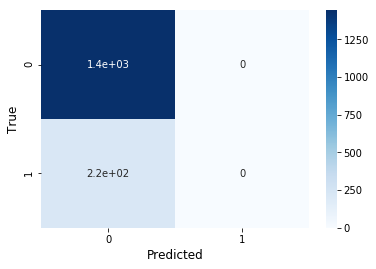

In [233]:
# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np

print("Train accuracy:", np.round(accuracy_score(y_treino_pca, modelo.predict(x_treino_pca)), 2))
print("Test accuracy:", np.round(accuracy_score(y_teste_pca, valores_previstos), 2))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_teste_pca, valores_previstos)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)